# Hyperparameter Tuning for Sentiment Analysis with Gradient Boosting

This notebook demonstrates hyperparameter optimization for a Gradient Boosting Classifier model to perform sentiment analysis. We'll track experiments with MLflow and find the best model configuration.

## Setup and Imports

In [1]:
import numpy as np
import mlflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')
from src.models.train_models import ModelTrainer
from src.models.predict_models import ModelPredictor
from src.config import *

## Define Hyperparameter Grid

We'll create a grid of hyperparameters to search through:

- **n_estimators**: Number of boosting stages/trees
- **learning_rate**: Step size shrinkage used to prevent overfitting
- **max_depth**: Maximum depth of individual regression estimators

In [ ]:
# Define hyperparameter grids to search 
n_estimators_values = [50, 100, 200]
learning_rate_values = [0.05, 0.1, 0.2]
max_depth_values = [3, 5, 7]

## Hyperparameter Grid Search

Now we'll run through all combinations of hyperparameters and track the results using MLflow.

In [3]:
results = []

for n_estimators in n_estimators_values:
    for learning_rate in learning_rate_values:
        for max_depth in max_depth_values:
            print(f"Training with n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}")
            try:
                run_id = ModelTrainer.gradient_boosting(
                    n_estimators=n_estimators, 
                    learning_rate=learning_rate, 
                    max_depth=max_depth
                )

                with mlflow.start_run(run_id=run_id):
                    run = mlflow.get_run(run_id)
                    metrics = run.data.metrics
                    params = run.data.params

                    results.append({
                        'run_id': run_id,
                        'n_estimators': params.get('n_estimators'),
                        'learning_rate': params.get('learning_rate'),
                        'max_depth': params.get('max_depth'),
                        'train_accuracy': metrics.get('train_accuracy'),
                        'test_accuracy': metrics.get('test_accuracy'),
                        'test_precision': metrics.get('test_precision'),
                        'test_recall': metrics.get('test_recall'),
                        'test_f1': metrics.get('test_f1'),
                    })
            except Exception as e:
                print(f"Error training with n_estimators={n_estimators}, learning_rate={learning_rate}, max_depth={max_depth}: {e}")
                continue

Training with n_estimators=50, learning_rate=0.05, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


e:\HCMUT-year 3 project\ml-course-shibainu-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Training with n_estimators=50, learning_rate=0.05, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, learning_rate=0.05, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, learning_rate=0.1, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, learning_rate=0.1, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, learning_rate=0.1, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, learning_rate=0.2, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, learning_rate=0.2, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=50, learning_rate=0.2, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.05, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.05, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.05, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.1, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.1, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.1, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.2, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.2, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=100, learning_rate=0.2, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.05, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.05, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.05, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.1, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.1, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.1, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.2, max_depth=3
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.2, max_depth=5
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


Training with n_estimators=200, learning_rate=0.2, max_depth=7
Using active MLflow experiment 'sentiment_classification' with ID 628719013361640366


## Print All Model Test Accuracies

Let's display the test accuracies for all models, sorted by performance.


All Models Test Accuracies (sorted):

n_estimators learning_rate max_depth  test_accuracy
         200           0.2         7       0.853792
         100           0.2         7       0.849800
         200           0.1         7       0.849800
         200           0.2         5       0.849800
         200           0.1         5       0.849301
         200           0.2         3       0.847555
         100           0.1         7       0.844810
         100           0.2         5       0.843313
         200          0.05         7       0.843064
          50           0.2         7       0.839820
         100           0.1         5       0.837824
         100           0.2         3       0.837824
         200           0.1         3       0.837575
          50           0.2         5       0.837076
         200          0.05         5       0.836078
          50           0.1         7       0.835579
         100          0.05         7       0.828842
          50           0.

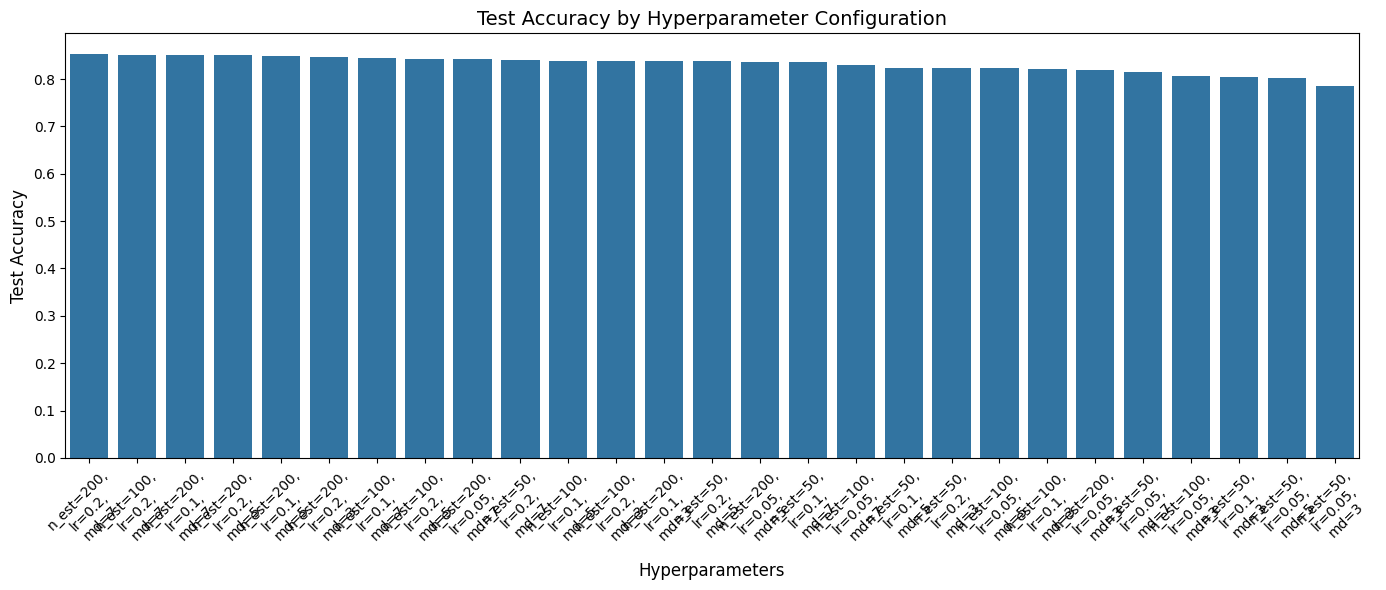

In [4]:
# Create dataframe from results
results_df = pd.DataFrame(results)

# Print all model test accuracies, sorted from best to worst
if not results_df.empty and 'test_accuracy' in results_df.columns:
    sorted_results = results_df.sort_values('test_accuracy', ascending=False)
    
    print("\nAll Models Test Accuracies (sorted):\n")
    print(sorted_results[['n_estimators', 'learning_rate', 'max_depth', 'test_accuracy']].to_string(index=False))
    
    # Create a combined label for each configuration
    sorted_results['config'] = sorted_results.apply(
        lambda row: f"n_est={row['n_estimators']},\nlr={row['learning_rate']},\nmd={row['max_depth']}", axis=1)
    
    # Plot with the combined label
    plt.figure(figsize=(14, 6))
    sns.barplot(x='config', y='test_accuracy', data=sorted_results)
    plt.title('Test Accuracy by Hyperparameter Configuration', fontsize=14)
    plt.xlabel('Hyperparameters', fontsize=12)
    plt.ylabel('Test Accuracy', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\nNo successful model runs found with test_accuracy metric.")

## Analyzing Results and Finding the Best Model

In [5]:
# Find the best model
if not results_df.empty and 'test_accuracy' in results_df.columns:
    best_model = results_df.loc[results_df['test_accuracy'].idxmax()]
    best_run_id = best_model['run_id']
    
    print("\nBest model:")
    print(f"n_estimators: {best_model['n_estimators']}, learning_rate: {best_model['learning_rate']}, max_depth: {best_model['max_depth']}")
    print(f"Test Accuracy: {best_model['test_accuracy']:.4f}")
    print(f"Test Precision: {best_model['test_precision']:.4f}")
    print(f"Test Recall: {best_model['test_recall']:.4f}")
    print(f"Test F1: {best_model['test_f1']:.4f}")
    print(f"Run ID: {best_run_id}")
else:
    print("\nNo successful model runs found with test_accuracy metric.")
    best_run_id = None


Best model:
n_estimators: 200, learning_rate: 0.2, max_depth: 7
Test Accuracy: 0.8538
Test Precision: 0.8483
Test Recall: 0.8538
Test F1: 0.8398
Run ID: 6917fc00072141afa4c3417478c8c4e8


## Making Predictions with the Best Model

In [6]:
if best_run_id is not None:
    # Prediction with the best model found
    texts = np.array(["This product works great!", 
                     "Terrible experience...",
                     "It's just okay, nothing special but does the job"])
    predictions = ModelPredictor.predict(best_run_id, texts)

    print(f"\nPredictions with Best Model (Run ID: {best_run_id[:8]}...):\n")
    for text, pred in zip(texts, predictions):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"'{text}' -> {sentiment}")


Predictions with Best Model (Run ID: 6917fc00...):

'This product works great!' -> Positive
'Terrible experience...' -> Negative
'It's just okay, nothing special but does the job' -> Negative


## Model Analysis - Feature Importance

Let's examine the feature importance from our Gradient Boosting model.


Top 20 Most Important Features:
          Feature  Importance
0             not    0.070641
1           great    0.034368
2            best    0.019092
3             and    0.017894
4             bad    0.014646
5            love    0.014405
6    disappointed    0.013509
7             but    0.012876
8             was    0.012035
9              ok    0.011157
10           good    0.011144
11      delicious    0.011091
12          worst    0.010560
13       terrible    0.010453
14  disappointing    0.009035
15        however    0.008561
16         return    0.008199
17            the    0.008169
18           okay    0.007597
19  unfortunately    0.007434


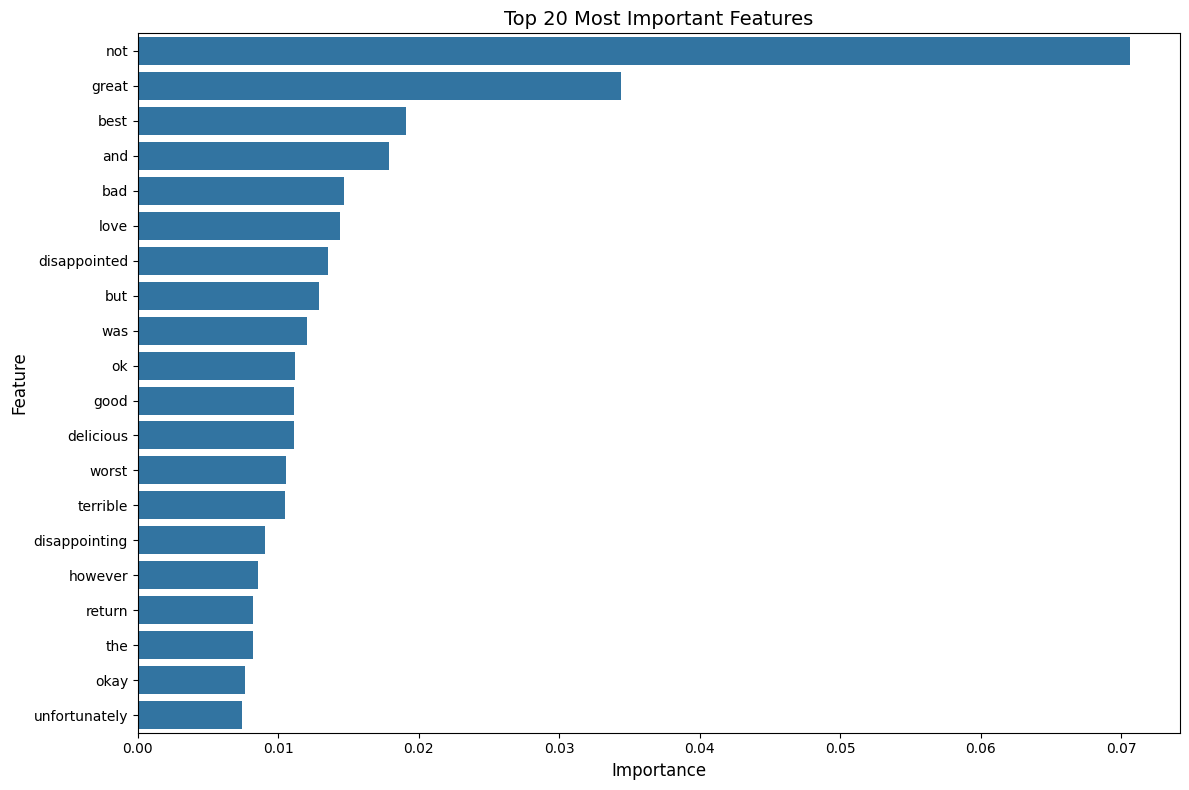

In [7]:
if best_run_id is not None:
    # Load the model
    model = mlflow.sklearn.load_model(f"runs:/{best_run_id}/model")
    
    # Extract the feature importance
    vectorizer = model.named_steps['vectorizer']
    classifier = model.named_steps['classifier']
    
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    
    # Get feature importance
    try:
        importances = classifier.feature_importances_
        
        # Create DataFrame with feature names and importance
        feature_importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
        })
        
        # Sort by importance
        feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False).reset_index(drop=True)
        
        # Display top 20 features
        print("\nTop 20 Most Important Features:")
        print(feature_importance_df.head(20))
        
        # Plot top 20 features
        plt.figure(figsize=(12, 8))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
        plt.title('Top 20 Most Important Features', fontsize=14)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not extract feature importance: {e}")

## Testing with Custom Reviews

In [9]:
# Define custom reviews
custom_reviews = np.array([
    "This product is amazing! I would definitely recommend it to everyone.",
    "The quality is very poor and it broke after just one use. Don't waste your money.",
    "It's an okay product, not great but not terrible either.",
    "I'm really impressed with how well this works. Exceeds expectations!",
    "Worst purchase ever. Complete waste of money and time."
])

if best_run_id is not None:
    # Make predictions
    predictions = ModelPredictor.predict(best_run_id, custom_reviews)
    
    # Display results
    print("Custom Review Predictions:")
    for i, (review, pred) in enumerate(zip(custom_reviews, predictions)):
        sentiment = "Positive" if pred == 1 else "Negative"
        print(f"\nReview {i+1}:")
        print(f"Text: {review}")
        print(f"Predicted Sentiment: {sentiment}")

Custom Review Predictions:

Review 1:
Text: This product is amazing! I would definitely recommend it to everyone.
Predicted Sentiment: Positive

Review 2:
Text: The quality is very poor and it broke after just one use. Don't waste your money.
Predicted Sentiment: Negative

Review 3:
Text: It's an okay product, not great but not terrible either.
Predicted Sentiment: Negative

Review 4:
Text: I'm really impressed with how well this works. Exceeds expectations!
Predicted Sentiment: Positive

Review 5:
Text: Worst purchase ever. Complete waste of money and time.
Predicted Sentiment: Negative
